<a href="https://colab.research.google.com/github/Architha-sketch/Python-for-DataScience/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


# Step 1: Simulate Sales Data

data = {
    "OrderID": [101, 102, 103, 104, 105, 106],
    "Product": ["Laptop", "Mobile", "Laptop", "Headphones", "Tablet", "Mobile"],
    "Quantity": [2, 5, 1, 10, 3, 7],
    "Price": [60000, 15000, 60000, 2000, 25000, 15000]
}

df = pd.DataFrame(data)
print(" Original Data ")
print(df)


# Step 2: Total Sale (Quantity × Price)

df["Total_Sale"] = df["Quantity"] * df["Price"]
print("\n Data with Total Sale ")
print(df)


# Step 3: Filter Orders where Total Sale > 1000

high_sales = df[df["Total_Sale"] > 1000]
print("\n Orders with Total Sale > 1000 ")
print(high_sales)


# Step 4: Find Most Sold Product (by Quantity)

most_sold = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
print("\n Most Sold Products ")
print(most_sold)


# Step 5: Add Discount Column
# (e.g., 10% if sale > 50000, 5% if sale > 20000, else 0%)
def discount(sale):
    if sale > 50000:
        return 0.10 * sale
    elif sale > 20000:
        return 0.05 * sale
    else:
        return 0

df["Discount"] = df["Total_Sale"].apply(discount)
print("\n Data with Discounts ")
print(df)

# Step 6: Export Summary to Excel

summary = {
    "Total Orders": [len(df)],
    "Total Revenue": [df["Total_Sale"].sum()],
    "Most Sold Product": [most_sold.index[0]],
    "Total Quantity Sold": [most_sold.iloc[0]]
}

summary_df = pd.DataFrame(summary)
print("\n Sales Summary ")
print(summary_df)

# Export both data and summary
with pd.ExcelWriter("ecommerce_sales_summary.xlsx") as writer:
    df.to_excel(writer, sheet_name="Sales_Data", index=False)
    summary_df.to_excel(writer, sheet_name="Summary", index=False)

print("\n Data exported successfully to 'ecommerce_sales_summary.xlsx'")

 Original Data 
   OrderID     Product  Quantity  Price
0      101      Laptop         2  60000
1      102      Mobile         5  15000
2      103      Laptop         1  60000
3      104  Headphones        10   2000
4      105      Tablet         3  25000
5      106      Mobile         7  15000

 Data with Total Sale 
   OrderID     Product  Quantity  Price  Total_Sale
0      101      Laptop         2  60000      120000
1      102      Mobile         5  15000       75000
2      103      Laptop         1  60000       60000
3      104  Headphones        10   2000       20000
4      105      Tablet         3  25000       75000
5      106      Mobile         7  15000      105000

 Orders with Total Sale > 1000 
   OrderID     Product  Quantity  Price  Total_Sale
0      101      Laptop         2  60000      120000
1      102      Mobile         5  15000       75000
2      103      Laptop         1  60000       60000
3      104  Headphones        10   2000       20000
4      105      Tablet 

 Department Budget
   Department  Budget
0          HR   50000
1          IT  150000
2     Finance  100000
3   Marketing   80000
4  Operations  120000

 Actual Expenses 
   Department  Actual_Expenses
0          HR            55000
1          IT           140000
2     Finance           120000
3   Marketing            95000
4  Operations           110000

 Merged Data 
   Department  Budget  Actual_Expenses
0          HR   50000            55000
1          IT  150000           140000
2     Finance  100000           120000
3   Marketing   80000            95000
4  Operations  120000           110000

 Data with Variance 
   Department  Budget  Actual_Expenses  Variance
0          HR   50000            55000     -5000
1          IT  150000           140000     10000
2     Finance  100000           120000    -20000
3   Marketing   80000            95000    -15000
4  Operations  120000           110000     10000

 Departments Exceeding Budget 
  Department  Budget  Actual_Expenses  Variance

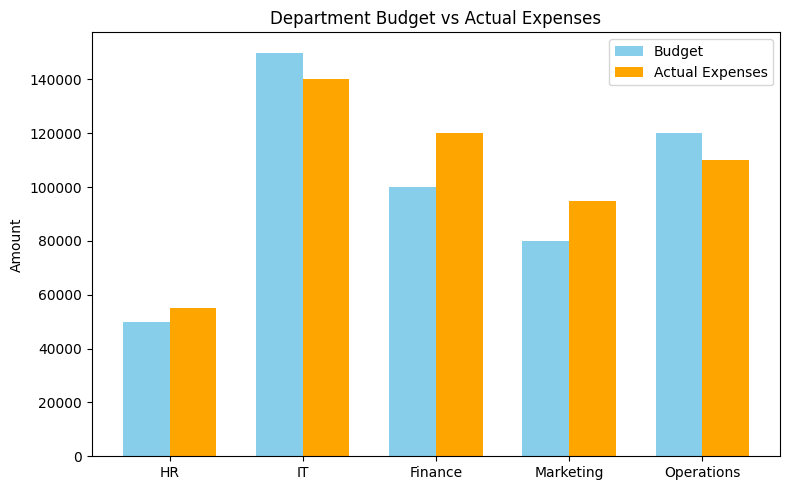

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 1: Create Department Budget DataFrame

budget_data = {
    "Department": ["HR", "IT", "Finance", "Marketing", "Operations"],
    "Budget": [50000, 150000, 100000, 80000, 120000]
}
df_budget = pd.DataFrame(budget_data)
print(" Department Budget")
print(df_budget)


# Step 2: Create Actual Expenses DataFrame

expenses_data = {
    "Department": ["HR", "IT", "Finance", "Marketing", "Operations"],
    "Actual_Expenses": [55000, 140000, 120000, 95000, 110000]
}
df_expenses = pd.DataFrame(expenses_data)
print("\n Actual Expenses ")
print(df_expenses)


# Step 3: Merge DataFrames

df_merged = pd.merge(df_budget, df_expenses, on="Department")
print("\n Merged Data ")
print(df_merged)


# Step 4: Calculate Variance (Budget - Actual)


df_merged["Variance"] = df_merged["Budget"] - df_merged["Actual_Expenses"]
print("\n Data with Variance ")
print(df_merged)


# Step 5: Identify Departments Exceeding Budget

exceeding = df_merged[df_merged["Variance"] < 0]
print("\n Departments Exceeding Budget ")
print(exceeding)


# Step 6: Sort by Variance

df_sorted = df_merged.sort_values(by="Variance")
print("\n Departments Sorted by Variance ")
print(df_sorted)




# Step 7: Optional - Bar Chart (Budget vs Expenses)

plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(df_merged["Department"]))

plt.bar(x, df_merged["Budget"], width=bar_width, label="Budget", color="skyblue")
plt.bar([i + bar_width for i in x], df_merged["Actual_Expenses"],
        width=bar_width, label="Actual Expenses", color="orange")

plt.xticks([i + bar_width/2 for i in x], df_merged["Department"])
plt.ylabel("Amount")
plt.title("Department Budget vs Actual Expenses")
plt.legend()
plt.tight_layout()


plt.savefig("budget_vs_expenses.pdf")   # <-- saves chart as PDF
plt.show()  # still shows chart on screen